In [4]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [5]:
files = os.listdir('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results')

In [6]:
dfs = []
for f in files:
    df1 = pd.read_csv('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results\\Adygeja_Resp_2022-03-20.csv', encoding = 'utf-8')
    dfs.append(df1)

In [7]:
data = pd.concat(dfs)

In [8]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)
results

,Unnamed: 0,Январь 2019,Февраль 2019,Март 2019,Апрель 2019,Май 2019,Июнь 2019,Июль 2019,Август 2019,Сентябрь 2019,...,Октябрь 2021,Ноябрь 2021,Декабрь 2021,Январь 2022,Февраль 2022,Март 2022,Апрель 2022,Май 2022,Июнь 2022,Июль 2022
0,РОССИЙСКАЯ ФЕДЕРАЦИЯ,3202534,3504045,4174296,4637280,3345201,4124086,5143083,5062245,5264321,...,7414571,6982998,9160939,5399672,6370846,5318699,4768289,3932303,5209410,4874474
1,ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,2202020,2361149,2790972,3049199,2151149,2681735,3624143,3615662,3569935,...,5221385,5060629,6416921,3846772,4306586,3412877,2843099,2393340,3238339,3084991
2,Белгородская область,10656,13641,22394,33260,15048,16404,23440,21638,32400,...,30885,32346,29733,21701,27127,34418,38343,61199,37831,18814
3,Брянская область,3968,7068,11434,6742,6153,10049,8571,8093,8299,...,12103,13204,12104,7712,10633,11670,14354,11741,9777,9017
4,Владимирская область,6898,6571,8488,9735,9273,10299,12018,14054,12856,...,14354,15666,16622,10490,19408,14412,14385,14773,12162,11735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Амурская область,3585,3556,6316,6126,6516,4082,5418,3189,4837,...,12191,10364,124977,18669,32695,7322,5921,4359,31936,4607
92,Магаданская область,2708,3056,5254,4551,1869,5002,4550,4884,9568,...,7156,5385,8156,4188,6608,8787,8179,10366,5201,5641
93,Сахалинская область,2723,4131,3855,12035,5664,4092,5864,4025,8775,...,5815,3842,6952,4051,10392,3244,4797,4908,5760,13035
94,Еврейская автономная область,183,162,15079,596,672,183,441,207,272,...,547,326,797,188,367,375,314,305,229,184


In [9]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

,Unnamed: 0,obj hash,name,reg num,sign date,suppliers count,st date,end date,price,enforcement,amount,bg
0,0,3793294491059705333,contracts_output,1010101008321000004,2021-09-27,1,2021-09-27,2021-12-31,500000.00,1,25000.00,0.050000
1,1,-4348589201702449915,contracts_output,1010400570119000014,2019-08-08,1,2021-01-01,2021-12-31,933718.40,1,373500.00,0.400014
2,2,7104910193783858246,contracts_output,1010400570119000016,2019-09-03,1,2021-01-01,2021-12-31,125125.25,0,6256.26,0.050000
3,3,-1585908082334183978,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,355169.38,1,19878.00,0.055968
4,4,-3961364508861951295,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,388020.88,1,19878.00,0.051229
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,6359,-4906157625135826188,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6360,6360,-8165939967697628755,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6361,6361,-725861710018253917,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106600.00,1,5500.00,0.051595
6362,6362,-2881107635711435453,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106599.90,1,5500.00,0.051595


In [10]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

In [11]:
date_list = pd.date_range('01.01.2019', '01.05.2023', freq='M')

In [12]:
t = (data.iloc[1])

In [13]:
d = list(map(lambda x: datetime.datetime(2019,6,25)<= x<= datetime.datetime(2021,12,31),date_list))

In [14]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [15]:
t_arr = np.zeros(len(date_list))

In [16]:
for r in data.iterrows():
    t_arr+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [17]:
df = pd.DataFrame(t_arr)

In [18]:
t_arr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.35125800e+06,
       3.35125800e+06, 3.51246190e+06, 1.52740937e+07, 1.52740937e+07,
       1.52740937e+07, 1.59160563e+07, 3.89691768e+08, 3.89759621e+08,
       3.88154395e+08, 4.02240035e+08, 4.52801145e+08, 4.74597792e+08,
       5.70950077e+08, 1.36250850e+09, 1.36454380e+09, 1.37109330e+09,
       1.52058201e+09, 1.52178014e+09, 1.55929842e+09, 1.57743131e+09,
       1.59636854e+09, 1.85164850e+09, 2.38791960e+09, 3.87949800e+09,
       4.78166245e+09, 4.90425817e+09, 5.14158360e+09, 5.22076973e+09,
       5.05966589e+09, 5.52158463e+09, 5.65319448e+09, 4.26604306e+09,
       2.45213939e+09, 2.44173101e+09, 2.14538657e+09, 1.97475195e+09,
       1.97128065e+09, 1.92525599e+09, 1.92020616e+09, 1.91925165e+09,
       1.87933916e+09, 1.73247153e+09, 1.73171462e+09, 4.95965493e+08])

<AxesSubplot:>

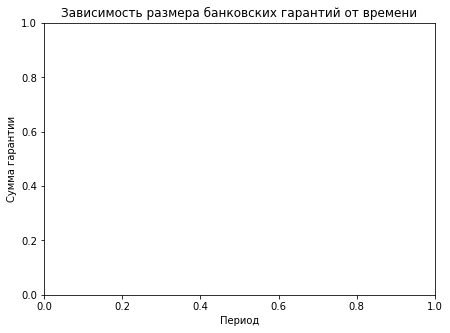

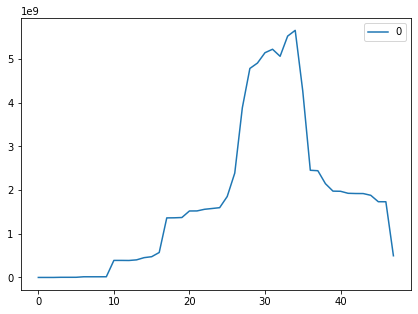

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.title('Зависимость размера банковских гарантий от времени')
df.plot()

# Задачи
* Подгрузка данных и их форматирование
* Анализ Корреляции двух рядов
* Продумать методы прогнозирования ряда
 + Какие модели можно использовать
 + Что делать с идеей аккумулирующего эффекта
 + Первый драфт


In [20]:
res = pd.DataFrame(results.iloc[0])

In [21]:
res1 = pd.DataFrame(res[-43:])
res1 = res1.rename_axis('date').reset_index()
res1 = res1.rename(columns={0: "credit"})
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')
res1 = res1.set_index('date')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df2 = df[:43]

In [23]:
df2 = df2.rename(columns={0: "amount"})
df2 = df2.rename_axis('date').reset_index()
df2['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
df2 = df2.set_index('date')

In [25]:
data1 = pd.concat([df2,res1], axis=1, join='inner')

In [26]:
data1.credit = data1.credit.astype(int)
data1 = data1.reindex(columns=['credit', 'amount'])

In [27]:
writer = pd.ExcelWriter('Data.xlsx')
data1.to_excel(writer,'data')
writer.save()
print('DataFrame is written successfully')

DataFrame is written successfully


In [28]:
data1

,credit,amount
date,,
2019-01-31,3202534,0.000000e+00
2019-02-28,3504045,0.000000e+00
2019-03-31,4174296,0.000000e+00
2019-04-30,4637280,3.351258e+06
2019-05-31,3345201,3.351258e+06
2019-06-30,4124086,3.512462e+06
2019-07-31,5143083,1.527409e+07
2019-08-31,5062245,1.527409e+07
2019-09-30,5264321,1.527409e+07


In [29]:
r1 = df2.month_num.corr(data1.amount)
r2 = data1.credit.astype(int).corr(data1.amount)
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r1, 3))
print('Значение коэффициента корреляции между объемом банковских гарантий и размером кредита = ', np.round(r2, 3))

AttributeError: 'DataFrame' object has no attribute 'month_num'

## Прогнозирование
sklearn:
* OLS и GLS - разница
* Регуляризация L1, L2

Этапы жизни модели:
* EDA
* preprocessing (Standartscaler, RFE and feature selection)
* data to : train, test, predict
    + fit
    + predict on test ( Metrics: r2,MAPE,MAE)
    + predict on predict with fitting on train+test


y = x0 + a1x1 + b(x2)^ + a2*t

### Что посмотреть:
* Борьба с сезнонностью (Ряд Фурье, STL разложение)
* Модели Экспоненциального сглаживания  (ETS Хольт-Уинтерс)
* ACF
* stl = STL(*params)
* res = stl.fit(y)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

### Что сделать:
* Построить регрессию от времени
* Построить регрессию от времени + кредиты
* Построить регрессию от кредитов
* Сравнить между собой по r^2,MAE,MAPE
* Экспоненциальное сглаживание


**Регрессионная модель**

*Гарантии+время*

In [ ]:
df2

In [ ]:
data1.amount.plot()
plt.ylabel('Amount')

In [ ]:
stl = STL(df2, period=12).fit()
stl.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(stl.observed)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stl.resid)

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
data1['amount'].plot(ax=ax1)
ax1.set_title(u'Объем банковских гарантий')
ax1.set_ylabel(u'Руб.')
ax2 = fig.add_subplot(122)
pd.Series(np.log10(data1['amount'])).plot(ax=ax2)
ax2.set_title(u'log10 от объема банковских гарантий')
ax2.set_ylabel(u'log10 от руб.')

In [ ]:
new_dates = pd.date_range('2019-01-01', '2019-12-01', freq='M')
new_dates = pd.Index(df2['date']) | new_dates
df3 = pd.DataFrame({'date': new_dates})
df4 = pd.merge(df2, df3, on='date', how='right')

In [ ]:
df4

In [ ]:
df2['month_num'] = range(1,len(df2)+1)
df2['log_y'] = np.log10(df2['amount'])

In [ ]:
for x in range(1,13):
    df2['season_' + str(x)] = df2['date'].dt.month == x

In [ ]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X = df2[['month_num'] + season_columns]
Y = df2['log_y']
X1 = X[X.index < 36]
Y1 = Y[Y.index < 36]

In [ ]:
df2.fillna(0, inplace=True)

In [ ]:
df2

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X1,Y1)

In [ ]:
import math

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': Y1})
pred.plot()

In [ ]:
#прогноз
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': Y})
pred.plot()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y, model.predict(X))
mse = mean_squared_error(Y, model.predict(X))
R2 = r2_score(Y, model.predict(X))
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

*Гарантии+время, полином 3 степени*

In [ ]:
df2['t^2'] = df2['month_num']**2
df2['t^3'] = df2['month_num']**3

In [ ]:
df2

In [ ]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X2 = df2[['month_num', 't^2', 't^3'] + season_columns]
Y2 = df2['amount']
X3 = X2[X.index < 36]
Y3 = Y2[Y.index < 36]

In [ ]:
model2 = LinearRegression()
model.fit(X3,Y3)

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X3),
    'real': Y3})
pred.plot()

In [ ]:
#прогноз
pred2 = pd.DataFrame({
    'pred': model.predict(X2),
    'real': Y2})
pred.plot()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:

mae = mean_absolute_error(Y2, model.predict(X2))
mse = mean_squared_error(Y2, model.predict(X2))
R2 = r2_score(Y2, model.predict(X2))
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))


*Гарантии+кредит полином 3 степени*

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
data1['amount'].plot(ax=ax1)
ax1.set_title(u'Объем банковских гарантий')
ax1.set_ylabel(u'Руб.')
ax2 = fig.add_subplot(122)
pd.Series(np.log10(data1['amount'])).plot(ax=ax2)
ax2.set_title(u'log10 от объема банковских гарантий')
ax2.set_ylabel(u'log10 от руб.')

In [ ]:
data1.credit.plot()
plt.ylabel('Credit')

In [ ]:
stl_credit = STL(res1, period=12).fit()
stl_credit.plot()

In [ ]:
adf_test = adfuller(stl_credit.observed)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

In [ ]:
new_data['credit'].hist()

In [ ]:
plt.scatter(new_data.credit, new_data.amount, color='blue')
plt.xlabel('credits')
plt.ylabel('amount')
plt.show()

In [ ]:
reg_model = LinearRegression()

In [ ]:
train_x = np.asanyarray(new_data[['credit']][:24])
train_y = np.asanyarray(new_data[['amount']][:24])
test_x = np.asanyarray(new_data[['credit']][24:])
test_y = np.asanyarray(new_data[['amount']][24:])

In [ ]:
reg_model.fit(train_x,train_y)

In [ ]:
reg_model.predict(test_x)

In [ ]:
test_y

In [ ]:
predict = pd.DataFrame({
    'pred': reg_model.predict(test_x),
    'real': np.asanyarray(new_data[['amount']][24:])})
pred.plot()

In [ ]:
for x in range(1,13):
    res1['season_' + str(x)] = res1['']

**Модель Хольта-Винтерса**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose_result = seasonal_decompose(data1['amount'],model='additive')
decompose_result.plot()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
m = 12
alpha = 1/(2*m)

In [ ]:
df2.amount

In [ ]:
new_data = data1[3:]

In [ ]:
new_data

*Мультипликативный тренд*

In [ ]:
new_data['HWES3_MUL'] = ExponentialSmoothing(new_data['amount'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
new_data[['amount','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Seasonality')

In [ ]:
train_amount_mul = data1.amount[:24]
test_amount_mul = data1.amount[24:]

In [ ]:
fitted_model_mul = ExponentialSmoothing(data1['amount'],trend='mul',seasonal='add',seasonal_periods=12).fit()
test_predictions_mul = fitted_model_mul.forecast(19)

*Аддитивный тренд*

In [ ]:
new_data['HWES3_ADD'] = ExponentialSmoothing(new_data['amount'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
new_data[['amount','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Seasonality')

In [ ]:
train_amount_add = new_data.amount[:24]
test_amount_add = new_data.amount[24:]

In [ ]:
fitted_model_add = ExponentialSmoothing(new_data['amount'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_add = fitted_model_add.forecast(16)

In [ ]:
new_data.amount.plot(legend=True,label='REAL')
train_amount_add.plot(legend=True,label='TRAIN')
test_amount_add.plot(legend=True,label='TEST', figsize=(6,4))
test_predictions_add.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test')

In [ ]:
test_amount_add.plot(legend=True,label='TEST',figsize=(9,6))
test_predictions_add.plot(legend=True,label='PREDICTION',xlim=['2022–31–07','2023–31–07'])

In [ ]:
mae = mean_absolute_error(test_amount_add, test_predictions_add)
mse = mean_squared_error(test_amount_add, test_predictions_add)
R2 = r2_score(test_amount_add, test_predictions_add)
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))